# Trabalho Final - Modelos de IA e Machine Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Exercício 2.1

Utilizando o arquivo UsuariosTempoMedioQuantidade.csv, que é uma amostra do tempo de utilização dos usuários em um determinado sistema, faça a clusterização utilizando k means e DBSCAN.

a) O que representam os clusters gerados?

### *Os clusters representam usuários que fazem pesquisas com uma duração de tempo semelhante.*

b) Qual é a melhor quantidade de Clusters?

### *A melhor quantidade é 4 clusters.*

c) Qual é a melhor técnica (k means ou DBSCAN) a ser utilizada nessa clusterização

### *A melhor técnica é K-Means, pois no cenário de detecção de anomalias o DBScan considera ruído o que seria um dado relevante.*

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('data/2.1_usuarios-tempomedioquantidade.csv', sep=';', engine='python')

# Análise do dataset

In [3]:
dataset.head()

,NomeUsuario,Login,Email,NomeEquipe,Quantidade,TempoMedio
0,dadostab1,dadostab1,dadostab1@dadospesquisa.com.br,Equipe Dados Pesquisa,1498,0
1,axistab2,axistab2,axistab2@axiscriativa.com.br,Equipe Axis Criativa,461,75
2,axistab1,axistab1,axistab1@axiscriativa.com.br,Equipe Axis Criativa,445,7
3,planocdetab1,planocdetab1,planocdetab1@planocde.com.br,Equipe PlanoCDE,423,140
4,Usuario11,usuario11,usuario11@marketnnova.com,Equipe Marketnnova,351,22


In [4]:
dataset.shape

(602, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NomeUsuario  602 non-null    object
 1   Login        602 non-null    object
 2   Email        602 non-null    object
 3   NomeEquipe   602 non-null    object
 4   Quantidade   602 non-null    int64 
 5   TempoMedio   602 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


#### Não há valores nulos.

In [6]:
dataset.describe()

,Quantidade,TempoMedio
count,602.000000,602.000000
mean,23.392027,52.023256
std,80.951470,177.753076
min,1.000000,0.000000
25%,1.000000,16.000000
50%,1.000000,25.000000
75%,3.000000,34.000000
max,1498.000000,1303.000000


In [7]:
ds = pd.concat([dataset["Quantidade"],dataset["TempoMedio"]],axis=1)
ds.head()

,Quantidade,TempoMedio
0,1498,0
1,461,75
2,445,7
3,423,140
4,351,22


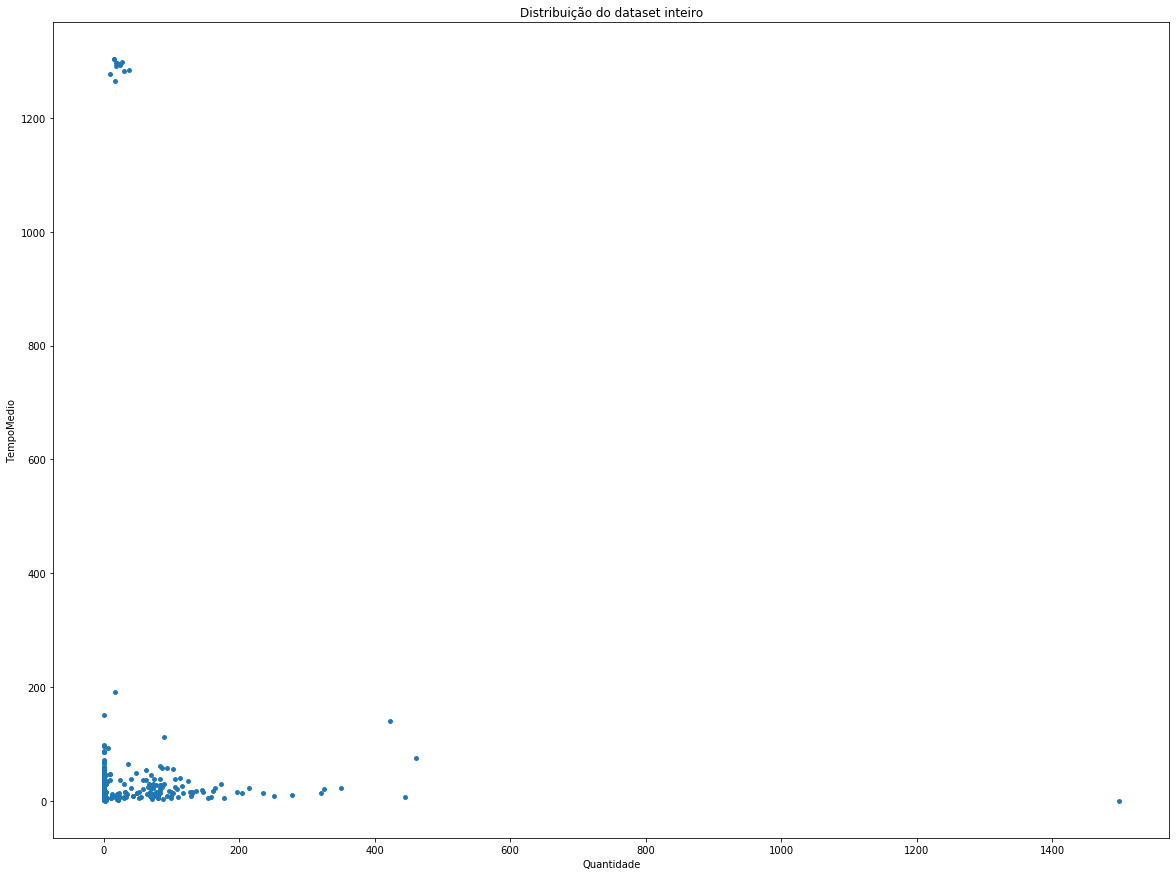

In [22]:
plt.figure(figsize = (20,15))
plt.title('Distribuição do dataset inteiro')
plt.xlabel('Quantidade')
plt.ylabel('TempoMedio')
plt.scatter(x=ds["Quantidade"],y=ds["TempoMedio"],s=15)
plt.show()

## Limpando outliers relevantes

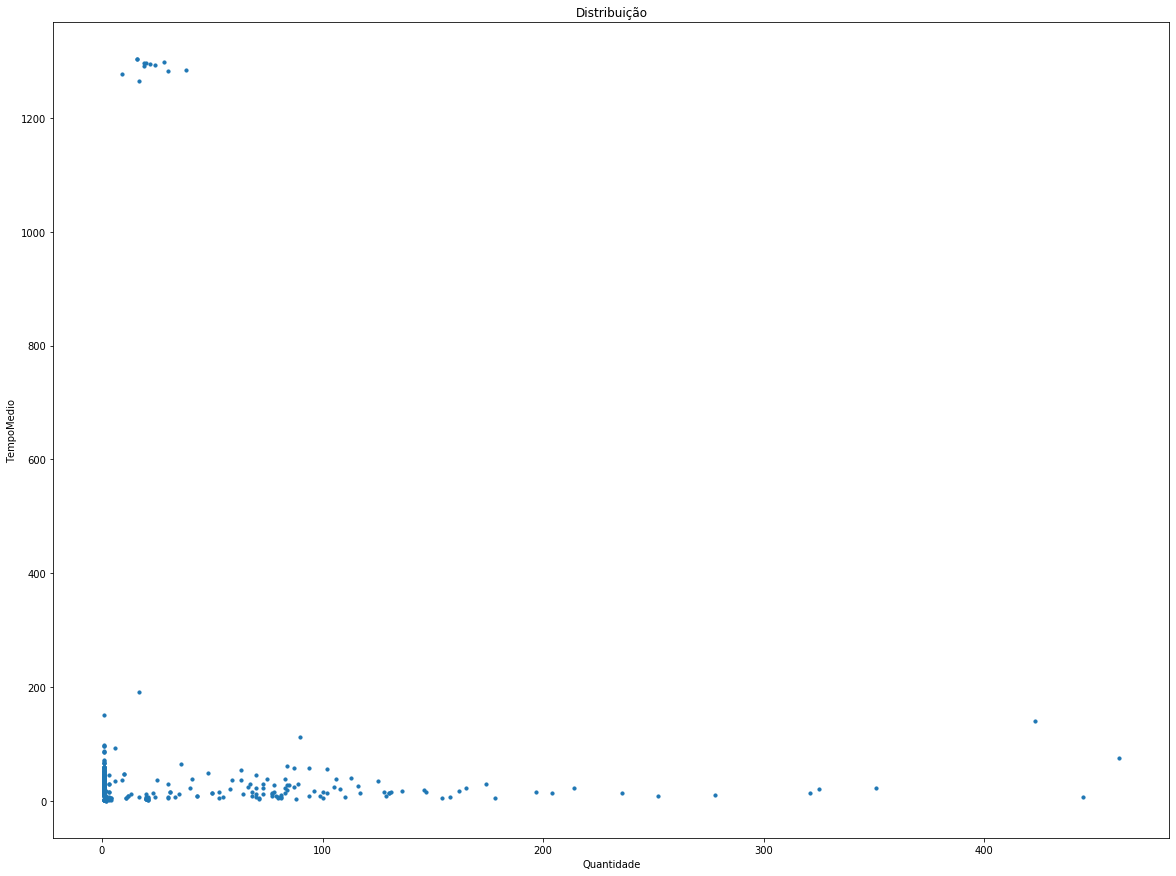

In [23]:
filtered_ds = ds[(np.abs(stats.zscore(ds)) < 10).all(axis=1)]

plt.figure(figsize = (20,15))
plt.title('Distribuição')
plt.xlabel('Quantidade')
plt.ylabel('TempoMedio')
plt.scatter(x=filtered_ds["Quantidade"],y=filtered_ds["TempoMedio"], s=10)
plt.show()

In [24]:
# Normaliza os Dados:
scaler = StandardScaler()
filtered_ds_norm = scaler.fit_transform(filtered_ds)

# K-Means

## Elbow Point

In [25]:
scores = []
inertias =[]
for i in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters = i, max_iter=100).fit(filtered_ds_norm)
    inertias.append(kmeans.inertia_)
    scores.append(silhouette_score(filtered_ds.values, kmeans.labels_))

100%|██████████| 8/8 [00:00<00:00, 22.86it/s]


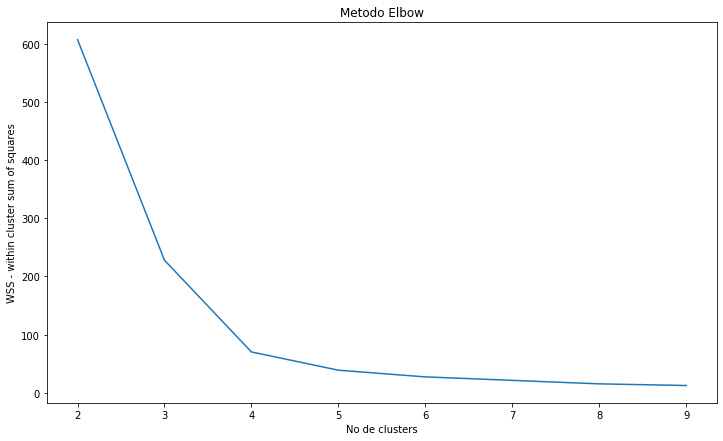

In [26]:
plt.figure(figsize = (12,7))
plt.plot(range(2, 10), inertias)
plt.title('Metodo Elbow')
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

#### O método Elbow point sugere 4 clusters.

## Silhouette Score

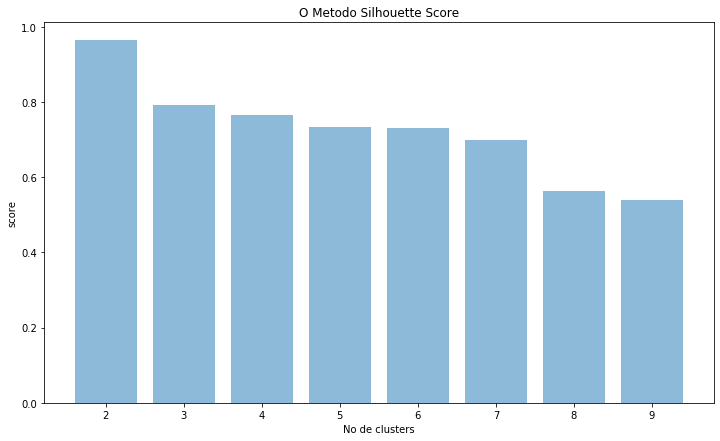

In [27]:
plt.figure(figsize = (12,7))
plt.bar(range(2, 10), scores,  align='center', alpha=0.5)
plt.title('O Metodo Silhouette Score')
plt.xlabel('No de clusters')
plt.ylabel('score')
plt.show()

In [28]:
arr_eps = [0.2, 0.15, 0.125, 0.1, 0.05, 0.03]
maior_silhouette_score = 0
melhor_eps = 0
qtd_clusters = 0
for eps_val in arr_eps:
    db = DBSCAN(eps=eps_val, min_samples=20).fit(filtered_ds_norm)
    labels = db.labels_
    print('-------------')
    print('EPS: {}'.format(eps_val))
    print('Clusters: {}'.format(set(labels)))
    if (len(set(labels)) > 1):
        print('Silhouette Score: {}'.format(silhouette_score(filtered_ds_norm, labels)))
        if silhouette_score(filtered_ds_norm, labels) > maior_silhouette_score:
            maior_silhouette_score = silhouette_score(filtered_ds_norm, labels)
            melhor_eps = eps_val
            qtd_clusters = len(set(labels)) - 1
print('-------------')
print('Maior Silhouette Score = {}'.format(maior_silhouette_score))
print('Melhor EPS = {}'.format(melhor_eps))
print('Numero de clusters = {}'.format(qtd_clusters))

-------------
EPS: 0.2
Clusters: {0, 1, -1}
Silhouette Score: 0.7486186714453702
-------------
EPS: 0.15
Clusters: {0, 1, 2, -1}
Silhouette Score: 0.6093817619866574
-------------
EPS: 0.125
Clusters: {0, -1}
Silhouette Score: 0.6879676116292025
-------------
EPS: 0.1
Clusters: {0, -1}
Silhouette Score: 0.6794399857304204
-------------
EPS: 0.05
Clusters: {0, -1}
Silhouette Score: 0.653167508542539
-------------
EPS: 0.03
Clusters: {0, -1}
Silhouette Score: 0.5645217233226588
-------------
Maior Silhouette Score = 0.7486186714453702
Melhor EPS = 0.2
Numero de clusters = 2


#### O método do silhouette score sugere 2 clusters, porém o gráfico que identifica o Elbow Point sugere um valor bastante distinto: 4.

In [32]:
# Definindo o numero de clusters
num_clusters = 4

# K-Means

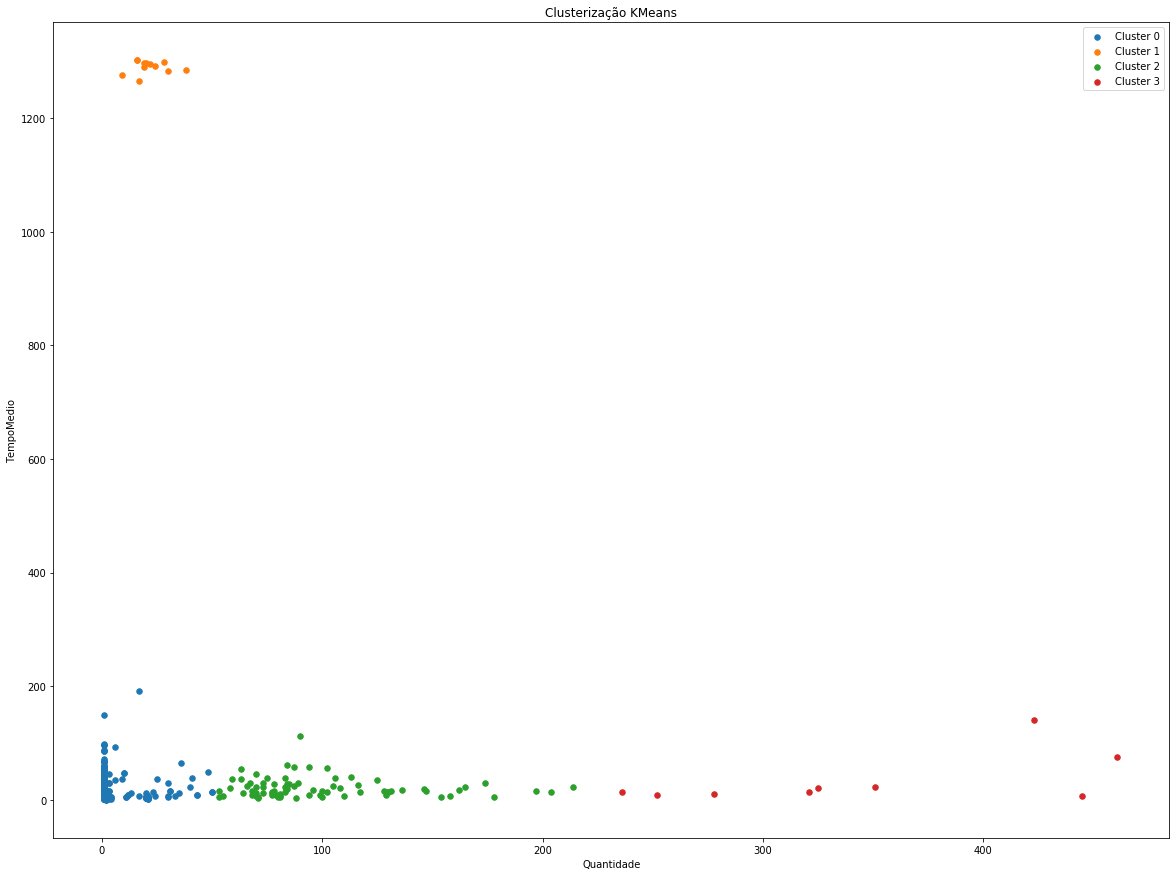

In [33]:
bestKmeans = KMeans(n_clusters = num_clusters, max_iter=100).fit(filtered_ds_norm)
clusters = pd.concat([filtered_ds, pd.DataFrame({'cluster':bestKmeans.labels_})], axis=1)
x = filtered_ds.values
labels = bestKmeans.labels_

plt.figure(figsize = (20,15))
plt.title('Clusterização KMeans')
plt.xlabel('Quantidade')
plt.ylabel('TempoMedio')
for cluster_number in range(0,4):
    label = "Cluster %s" % (cluster_number)
    plt.scatter(x[labels == cluster_number, 0], x[labels == cluster_number, 1], s = 30, label = label)
plt.legend()
plt.show()

# DBSCAN

In [20]:
db = DBSCAN(eps=melhor_eps, min_samples=20).fit(filtered_ds_norm)
filtered_ds['cluster'] = db.labels_
y_dbscan = filtered_ds['cluster'].values

## Plotando DBSCAN para 4 clusters

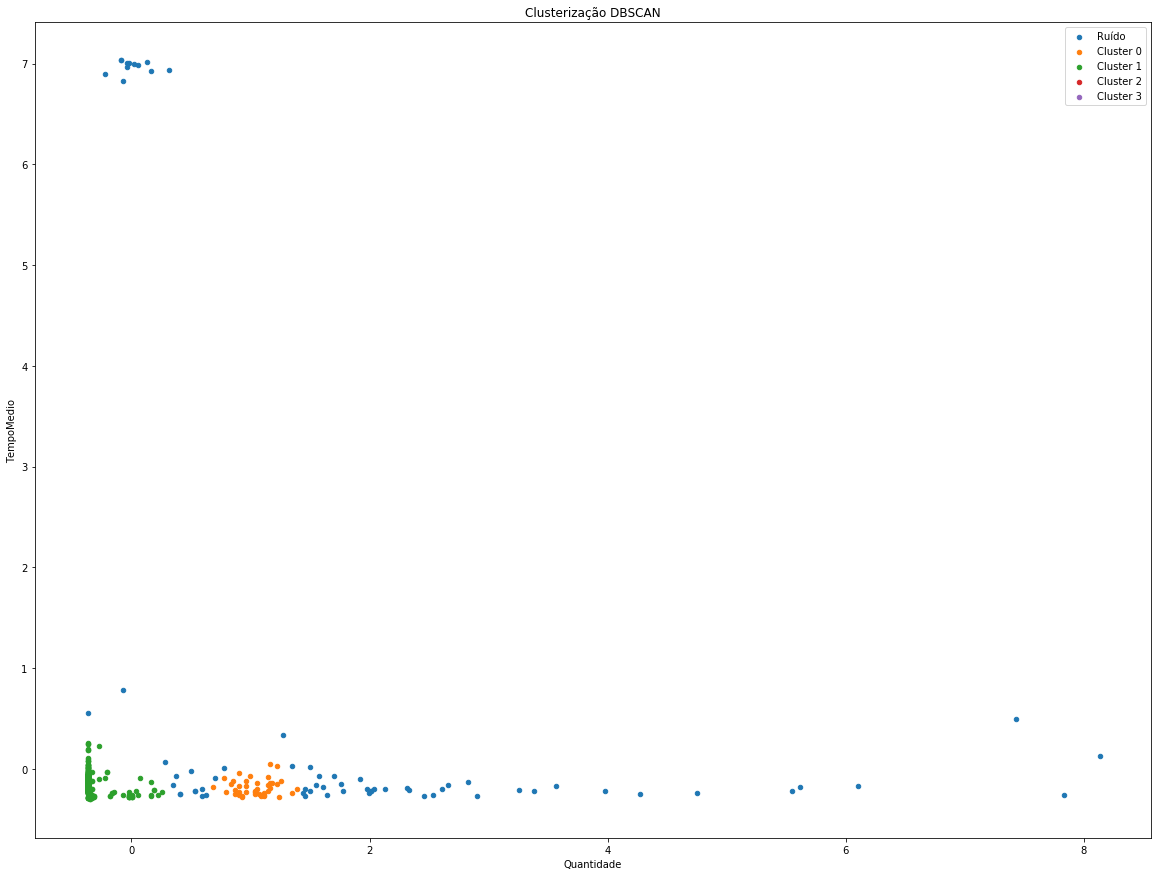

In [35]:
plt.figure(figsize = (20,15))
plt.title('Clusterização DBSCAN')
plt.xlabel('Quantidade')
plt.ylabel('TempoMedio')
for cluster_number in range(-1,num_clusters):
    if cluster_number >= 0:
        label = "Cluster %s" % (cluster_number)
    else:
        label = "Ruído"
    plt.scatter(filtered_ds_norm[y_dbscan == cluster_number, 0], filtered_ds_norm[y_dbscan == cluster_number, 1], s = 20, label = label)
plt.legend()
plt.show()

### DBScan considerou muitos ruídos, mas, para o caso a ser identificado, esses pontos de ruído são relevantes.